# Dynamo Implementation

Hi, this work flow follows the dynamo implementation as laid out in the dynamo tutorials for non (un)spliced data:
It utilises previously preprocessed, clustered and psuedo temporally ordered data as detailed in previous notebooks: Clustering, WB_pseudo

In [ ]:
import subprocess

def pip_install(package):
    subprocess.run(["pip", "install", package], stdout=subprocess.DEVNULL, stderr=subprocess.DEVNULL)

pip_install("dynamo-release")
pip_install("scanpy")

restart runtime owing to dynamo's dependancy on a depreciated numpy version

In [ ]:
from dynamo.preprocessing import Preprocessor
from sklearn.decomposition import PCA
import dynamo as dyn
import numpy as np
import anndata as ad
import scanpy as sc
from pickle import LONG1
import matplotlib.pyplot as plt
import pandas as pd
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Full path to the .h5ad file
file_path = '/content/drive/My Drive/Colab Notebooks/NSC3001/anndata_pseudotime.h5ad'

adata = ad.read_h5ad(file_path)

## Perform RNA Velocity inference

In [ ]:
adata.layers['M_s']=adata.X

### Using Palantir Pseudo time

In [ ]:
dyn.tl.pseudotime_velocity(adata,
                          pseudotime='palantir_pseudotime')

|-----> Embrace RNA velocity and velocity vector field analysis for pseudotime...
|-----> Retrieve neighbor graph and pseudotime...
|-----> Computing transition graph via calculating pseudotime gradient with hodge method...
|-----> Use pseudotime transition matrix to learn low dimensional velocity projection.
|-----> [projecting velocity vector to low dimensional embedding] in progress: 100.0000%|-----> [projecting velocity vector to low dimensional embedding] completed [0.9534s]
|-----> Use pseudotime transition matrix to learn gene-wise velocity vectors.
|-----> [projecting velocity vector to low dimensional embedding] in progress: 100.0000%|-----> [projecting velocity vector to low dimensional embedding] completed [30.0073s]


|-----> method arg is None, choosing methods automatically...
|-----------> method kd_tree selected
|-----------> plotting with basis key=X_umap
|-----------> skip filtering cluster_identity by stack threshold when stacking color because it is not a numeric type


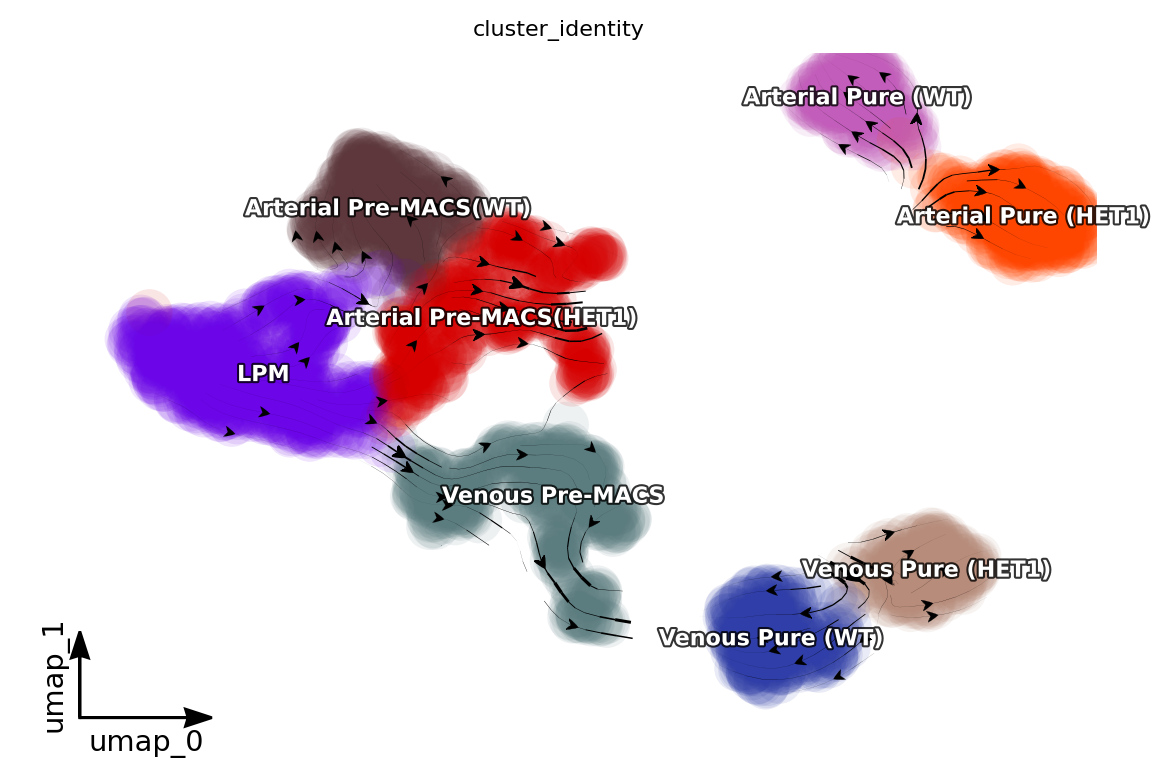

In [ ]:
dyn.pl.streamline_plot(adata, color=['cluster_identity'],
                       basis='umap', show_legend='on data',
                       show_arrowed_spines=True)

## Using dpt

In [ ]:
dyn.tl.pseudotime_velocity(adata,
                          pseudotime='dpt_pseudotime')

|-----> Embrace RNA velocity and velocity vector field analysis for pseudotime...
|-----> Retrieve neighbor graph and pseudotime...
|-----> Computing transition graph via calculating pseudotime gradient with hodge method...
|-----> Use pseudotime transition matrix to learn low dimensional velocity projection.
|-----> [projecting velocity vector to low dimensional embedding] in progress: 100.0000%|-----> [projecting velocity vector to low dimensional embedding] completed [0.9377s]
|-----> Use pseudotime transition matrix to learn gene-wise velocity vectors.
|-----> [projecting velocity vector to low dimensional embedding] in progress: 100.0000%|-----> [projecting velocity vector to low dimensional embedding] completed [41.1592s]


|-----> method arg is None, choosing methods automatically...
|-----------> method kd_tree selected
|-----------> plotting with basis key=X_umap
|-----------> skip filtering cluster_identity by stack threshold when stacking color because it is not a numeric type


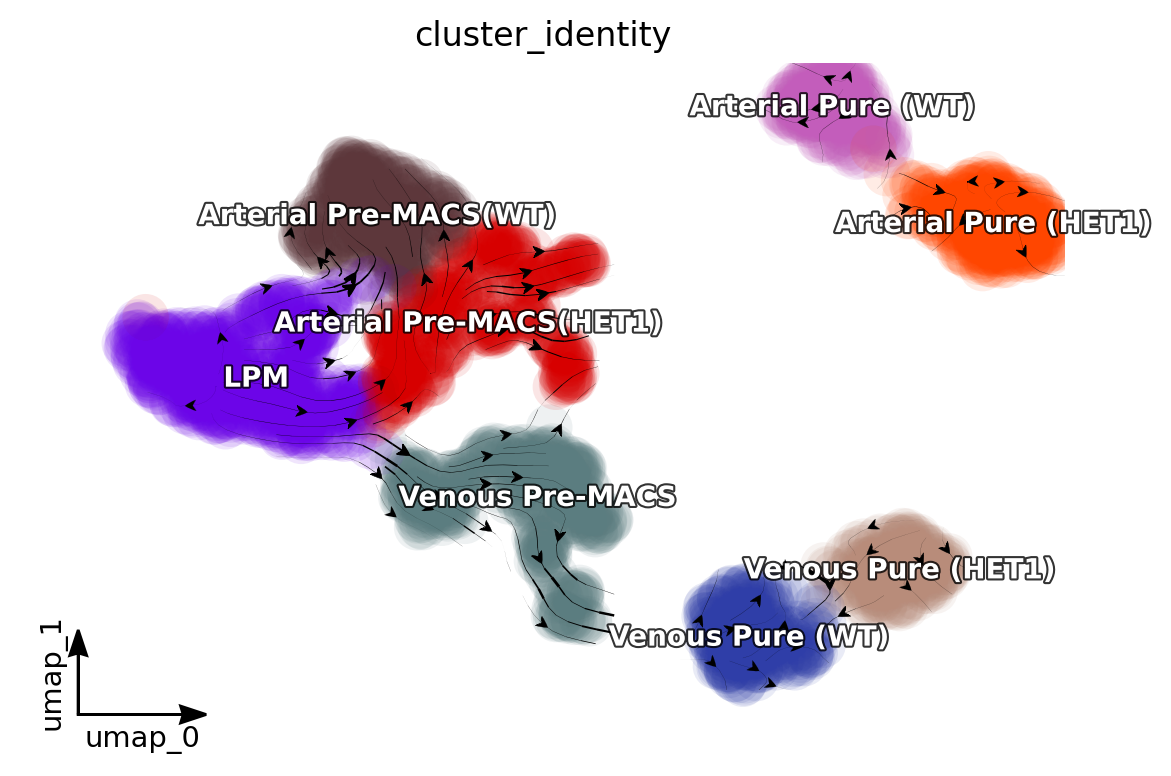

In [ ]:
dyn.pl.streamline_plot(adata, color=['cluster_identity'],
                       basis='umap', show_legend='on data',
                       show_arrowed_spines=True)

|-----> X shape: (3275, 2) V shape: (3275, 2)
|-----------> plotting with basis key=X_umap
|-----------> skip filtering cluster_identity by stack threshold when stacking color because it is not a numeric type


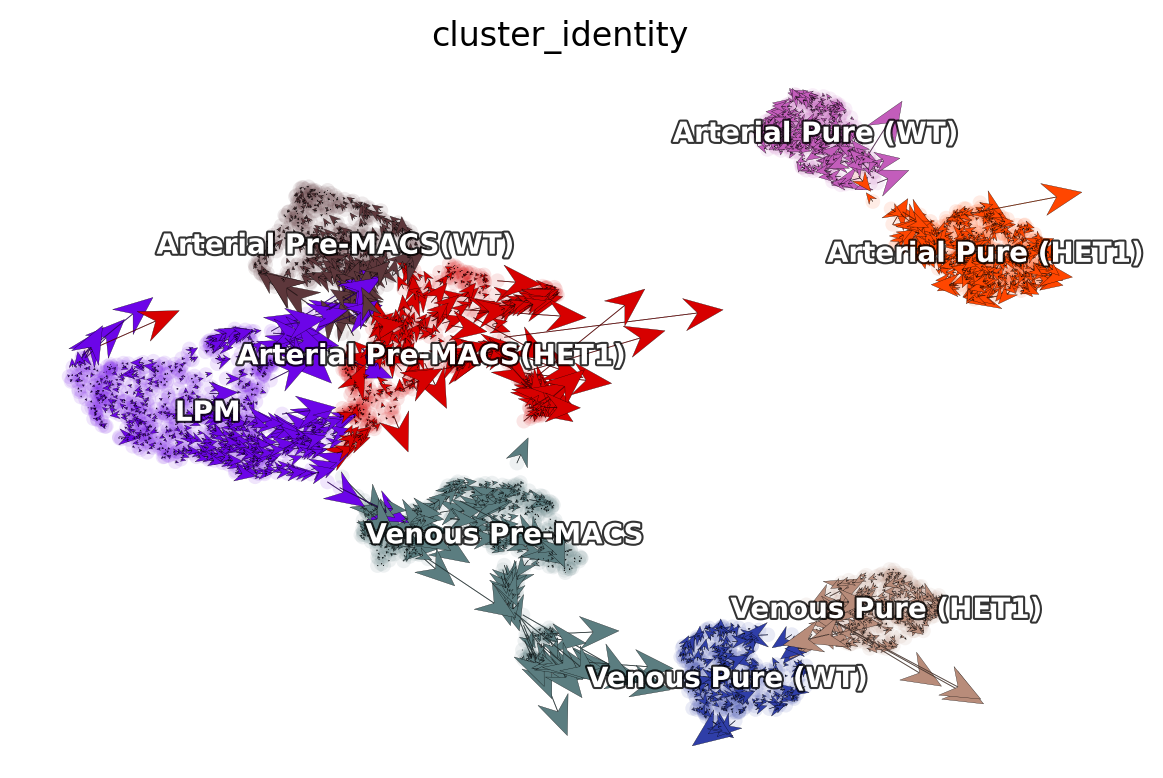

In [ ]:
dyn.pl.cell_wise_vectors(adata, color=['cluster_identity'], basis='umap',
                         show_legend='on data', quiver_length=6,
                         quiver_size=6, pointsize=0.1,
                         show_arrowed_spines=False)

In [ ]:
dyn.vf.VectorField(adata, basis='umap', M=1000, pot_curl_div=True)

|-----> VectorField reconstruction begins...
|-----> Retrieve X and V based on basis: UMAP. 
        Vector field will be learned in the UMAP space.
|-----> Generating high dimensional grids and convert into a row matrix.
|-----> Learning vector field with method: sparsevfc.
|-----> [SparseVFC] begins...
|-----> Sampling control points based on data velocity magnitude...
|-----> method arg is None, choosing methods automatically...
|-----------> method kd_tree selected
|-----> [SparseVFC] completed [15.7604s]
|-----> Running ddhodge to estimate vector field based pseudotime in umap basis...
|-----> graphizing vectorfield...
|-----> incomplete neighbor graph info detected: connectivities and distances do not exist in adata.obsp, indices not in adata.uns.neighbors.
|-----> Neighbor graph is broken, recomputing....
|-----> Start computing neighbor graph...
|-----------> X_data is None, fetching or recomputing...
|-----> fetching X data from layer:None, basis:pca
|-----> method arg is None

Calculating 2-D curl: 100%|██████████| 3275/3275 [00:00<00:00, 10552.30it/s]

|-----> Computing divergence...



Calculating divergence: 100%|██████████| 4/4 [00:00<00:00, 11.57it/s]


|-----> [VectorField] completed [42.1991s]


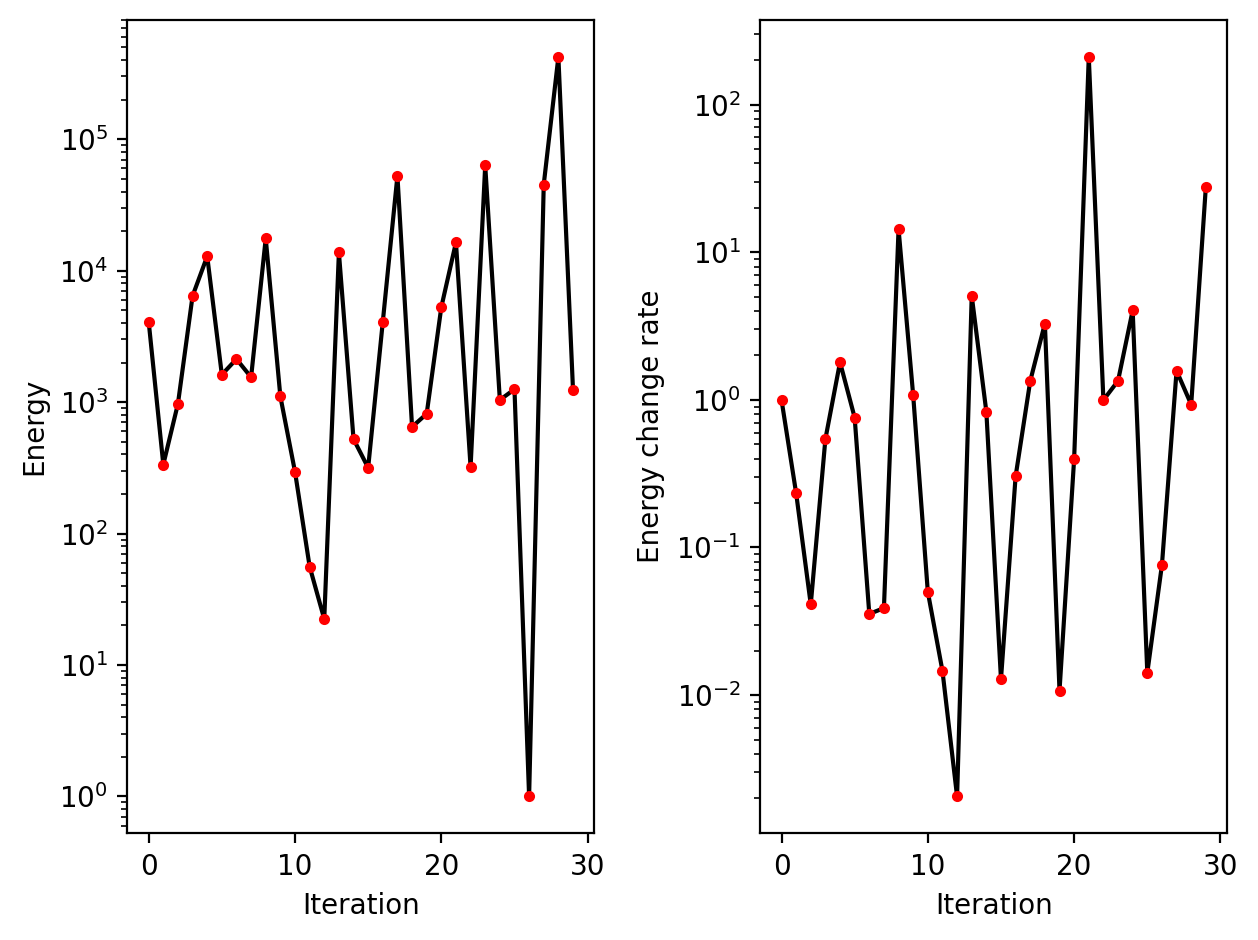

In [ ]:
dyn.pl.plot_energy(adata, basis='umap')

In [1]:
# dyn.pl.topography(adata, basis='umap', background='white',
#                   color=['ntr', 'cluster_identity'],
#                   streamline_color='black',
#                   show_legend='on data', frontier=True)

In [2]:
# dyn.pl.umap(adata,  color='umap_ddhodge_potential', frontier=True)